In [462]:
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor



In [463]:
df = pd.read_csv('boston.csv')

In [464]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [465]:
# Shape of dataset
print(df.shape)

(506, 14)


In [466]:
# Checking null values for training dataset
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [467]:
# Change 'MEDV' coulum name to 'PRICE'
df.rename(columns={'MEDV':'PRICE'}, inplace=True)

In [468]:
# Changed coloumn name
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Explore Data

In [347]:
#information about the training dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [348]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Feature Observation

In [388]:
# FInding out the correlation between the feature
corr = df.corr()
corr.shape

(14, 14)

<AxesSubplot:>

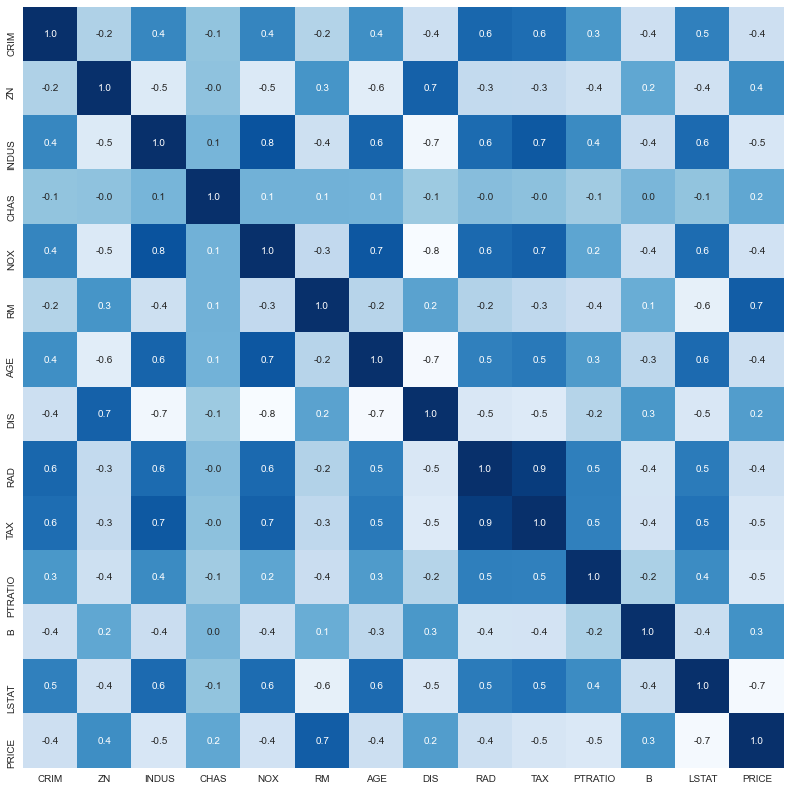

In [351]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar=False, square= True, fmt='.1f', annot=True, cmap='Blues')

<AxesSubplot:>

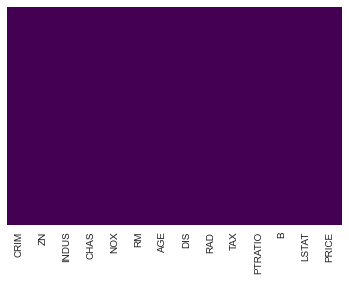

In [352]:
# Checking the null values using heatmap
# There is any null values are occupyed here
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Note: There are no null or missing values here.

<AxesSubplot:xlabel='RAD', ylabel='count'>

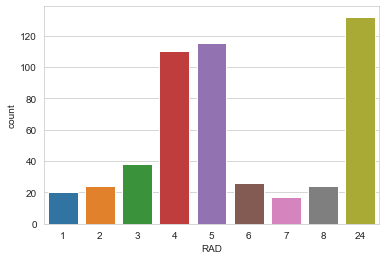

In [354]:
sns.set_style('whitegrid')
sns.countplot(x ='RAD', data=df)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

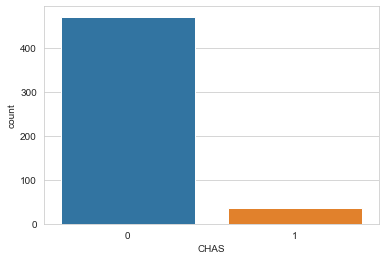

In [355]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',data=df)

<AxesSubplot:xlabel='CHAS', ylabel='count'>

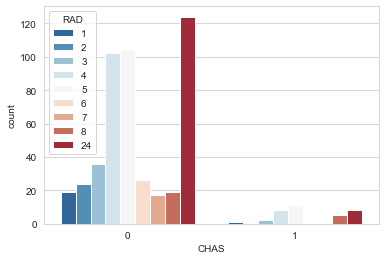

In [356]:
sns.set_style('whitegrid')
sns.countplot(x='CHAS',hue='RAD',data=df,palette='RdBu_r')

<AxesSubplot:xlabel='CRIM'>

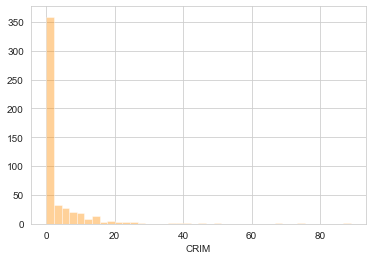

In [358]:
sns.distplot(df['CRIM'].dropna(),kde=False,color='darkorange',bins=40)

<AxesSubplot:xlabel='RM'>

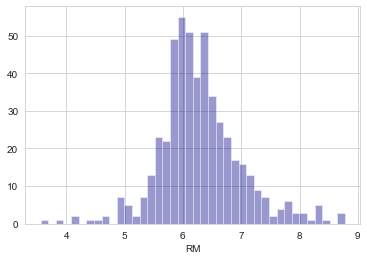

In [359]:
sns.distplot(df['RM'].dropna(),kde=False,color='darkblue',bins=40)

## Fearure Selection

In [360]:
X = df.iloc[:,0:13] #independent columns
y = df.iloc[:,-1] #target column i.e price range

In [361]:
y = np.round(df['PRICE'])
#Apply SelectKBest class to extract top 5 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,CRIM,5503.817133
1,ZN,5937.859414
2,INDUS,873.746270
3,CHAS,59.080170
4,NOX,5.073299
5,RM,21.981504
6,AGE,2424.308937
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


In [129]:
print(featureScores.nlargest(5,'Score')) #print 5 best features

   Specs         Score
9    TAX  14817.836927
1     ZN   5937.859414
0   CRIM   5503.817133
11     B   3340.486412
6    AGE   2424.308937


### Feature Importance

In [362]:

model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

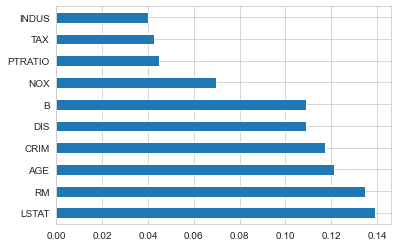

In [132]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_,
index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Model Fitting

### 1. Linear Regression

In [499]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [500]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [501]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [502]:
# prediction on training data
y_pred = model.predict(X_train)

In [503]:
#Accuracy of model
regTrain_score=model.score(X_train,y_train)*100
regTest_score=model.score(X_test,y_test)*100
print("Training Accuracy : ",regTrain_score)
print("Testing Accuracy : ",regTest_score)
print("Model Accuracy:",r2_score(y,model.predict(X))*100)

Training Accuracy :  77.30135569264233
Testing Accuracy :  58.9222384918251
Model Accuracy: 73.73440319905033


### Model Visualization

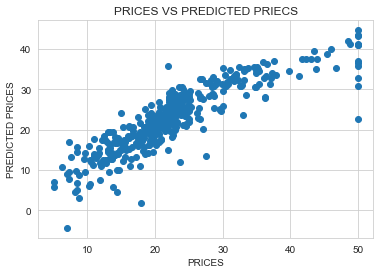

In [504]:
## visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("PRICES")
plt.ylabel("PREDICTED PRICES")
plt.title("PRICES VS PREDICTED PRIECS")
plt.show()

### Model Evalution

In [505]:
#accuracy for prediction on test data
y_pred = model.predict(X_test)

In [506]:
# R squared error
reg_score_1 = metrics.r2_score(y_test, y_pred)

# Mean Absolute Error
reg_score_2 = metrics.mean_absolute_error(y_test, y_pred)

# Mean Square Error
reg_score_3 = metrics.mean_squared_error(y_test, y_pred)

print('R squared error : ', reg_score_1)
print('Mean Absolute Error : ', reg_score_2)
print('Mean Square Error : ', reg_score_3)

R squared error :  0.589222384918251
Mean Absolute Error :  3.8429092204445046
Mean Square Error :  33.448979997676524


# 2. Random Forest Regressor

In [507]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [508]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [509]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [510]:
# prediction on training data
y_pred = model.predict(X_train)


In [511]:
#Accuracy of model
Random_Train_score=model.score(X_train,y_train)*100
Random_Test_score=model.score(X_test,y_test)*100
print("Training Accuracy : ",Random_Train_score)
print("Testing Accuracy : ",Random_Test_score)
print("Model Accuracy:",r2_score(y,model.predict(X))*100)

Training Accuracy :  98.22592805726605
Testing Accuracy :  74.98518318979303
Model Accuracy: 93.70754838666349


### Model Visualization

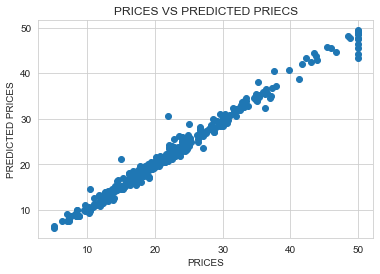

In [512]:
## visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("PRICES")
plt.ylabel("PREDICTED PRICES")
plt.title("PRICES VS PREDICTED PRIECS")
plt.show()

### Model Evalution

In [513]:
#accuracy for prediction on test data
y_pred = model.predict(X_test)

In [515]:
# R squared error
random_score_1 = metrics.r2_score(y_test, y_pred)

# Mean Absolute Error
random_score_2 = metrics.mean_absolute_error(y_test, y_pred)

# Mean Square Error
random_score_3 = metrics.mean_squared_error(y_test, y_pred)

print('R squared error : ', random_score_1)
print('Mean Absolute Error : ', random_score_2)
print('Mean Square Error : ', random_score_3)

R squared error :  0.7498518318979304
Mean Absolute Error :  2.7165882352941204
Mean Square Error :  20.369174862745115


# Decision Tree

In [516]:
X = df.iloc[:,[-1,5,10,4,9]]
y = df.iloc[:,-1]

In [517]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [518]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [519]:
# prediction on training data
y_pred = model.predict(X_train)

In [520]:
DesTrain_score=model.score(X_train,y_train)*100
DesTest_score=model.score(X_test,y_test)*100
print("Training Accuracy : ",DesTrain_score)
print("Testing Accuracy : ",DesTest_score)
print("Model Accuracy:",r2_score(y,model.predict(X))*100)

Training Accuracy :  100.0
Testing Accuracy :  99.92848285588113
Model Accuracy: 99.98609429974607


### Model Visualization

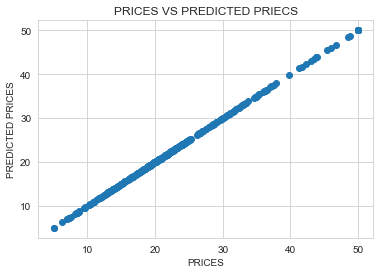

In [521]:
## visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("PRICES")
plt.ylabel("PREDICTED PRICES")
plt.title("PRICES VS PREDICTED PRIECS")
plt.show()

### Model Evalution

In [522]:
#accuracy for prediction on test data
y_pred = model.predict(X_test)

In [523]:
# R squared error
des_score_1 = metrics.r2_score(y_test, y_pred)

# Mean Absolute Error
des_score_2 = metrics.mean_absolute_error(y_test, y_pred)

# Mean Square Error
des_score_3 = metrics.mean_squared_error(y_test, y_pred)

print('R squared error : ', des_score_1)
print('Mean Absolute Error : ', des_score_2)
print('Mean Square Error : ', des_score_3)

R squared error :  0.9992848285588113
Mean Absolute Error :  0.09607843137254918
Mean Square Error :  0.05823529411764698


# Comparing all the models

In [524]:
models = pd.DataFrame({
    'Model': ['Linear Regression','Random Forest','Decision Tree'],
    'RMSE': [regscore_1, random_score_1, des_score_1],'Test_Accuracy': [regTest_score,Random_Test_score,DesTest_score]})
models.sort_values(by='RMSE', ascending=False)

,Model,RMSE,Test_Accuracy
2,Decision Tree,0.999285,99.928483
1,Random Forest,0.749852,74.985183
0,Linear Regression,0.589222,58.922238
